# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from featurewiz import featurewiz
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from imblearn.under_sampling import NearMiss
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


# Define Function

In [2]:
def remove_outliers(df,variables):
    q1 = percentile25 = df[variables].quantile(0.25)
    q3 = percentile75 = df[variables].quantile(0.75)
    iqr = q3-q1
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[variables] > upper_limit]
    df[df[variables] < lower_limit]
    new_data = df[df[variables] < upper_limit]
    df[variables] = np.where(
        df[variables] > upper_limit,
        upper_limit,
        np.where(
        df[variables] < lower_limit,
        lower_limit,
        df[variables]
        )
    )
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[variables])
    plt.subplot(2,2,2)
    sns.boxplot(df[variables])

In [3]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_test, y_test, y_pred

In [4]:
def accuracy_report(model, X_test, x,y):
    testing_accuracy =  accuracy_score(x, y) * 100
    testing_accuracy = "{:.2f}".format(testing_accuracy)
    roc_score = roc_auc_score(x, y)*100
    roc_score = "{:.2f}".format(roc_score)
    print('The accuracy of testing data is ', testing_accuracy, '%')
    print('The ROC_AUC score is ' , roc_score, '%')
    print(' ')
    print(classification_report(x, y))
    clf = confusion_matrix(x,y)
    ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print(' ')
    # ROC curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(x,y)
    auc = metrics.roc_auc_score(x,y)
    plt.figure(figsize=(12, 7))
    plt.plot(fpr, tpr, label="(LOG_R)auc = " + str(round(auc,2)))
    plt.plot([0,1], [0,1], color = "red", linestyle = "--",
    label = "random")
    plt.legend(loc=4)
    plt.show()


# Analysis Data

In [5]:
dataset = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [6]:
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [7]:
dataset.shape

(1025, 14)

In [8]:
dataset.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [9]:
print(dataset.nunique())

age                               41
sex                                2
chest_pain_type                    4
resting_blood_pressure            49
cholestoral                      152
fasting_blood_sugar                2
rest_ecg                           3
Max_heart_rate                    91
exercise_induced_angina            2
oldpeak                           40
slope                              3
vessels_colored_by_flourosopy      5
thalassemia                        4
target                             2
dtype: int64


In [10]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
['Male' 'Female']
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 

## Missing value analysis

In [11]:
dataset.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

There is no null value so that we can proceed to next step

# Exploratory Data Analysis

## Distribution

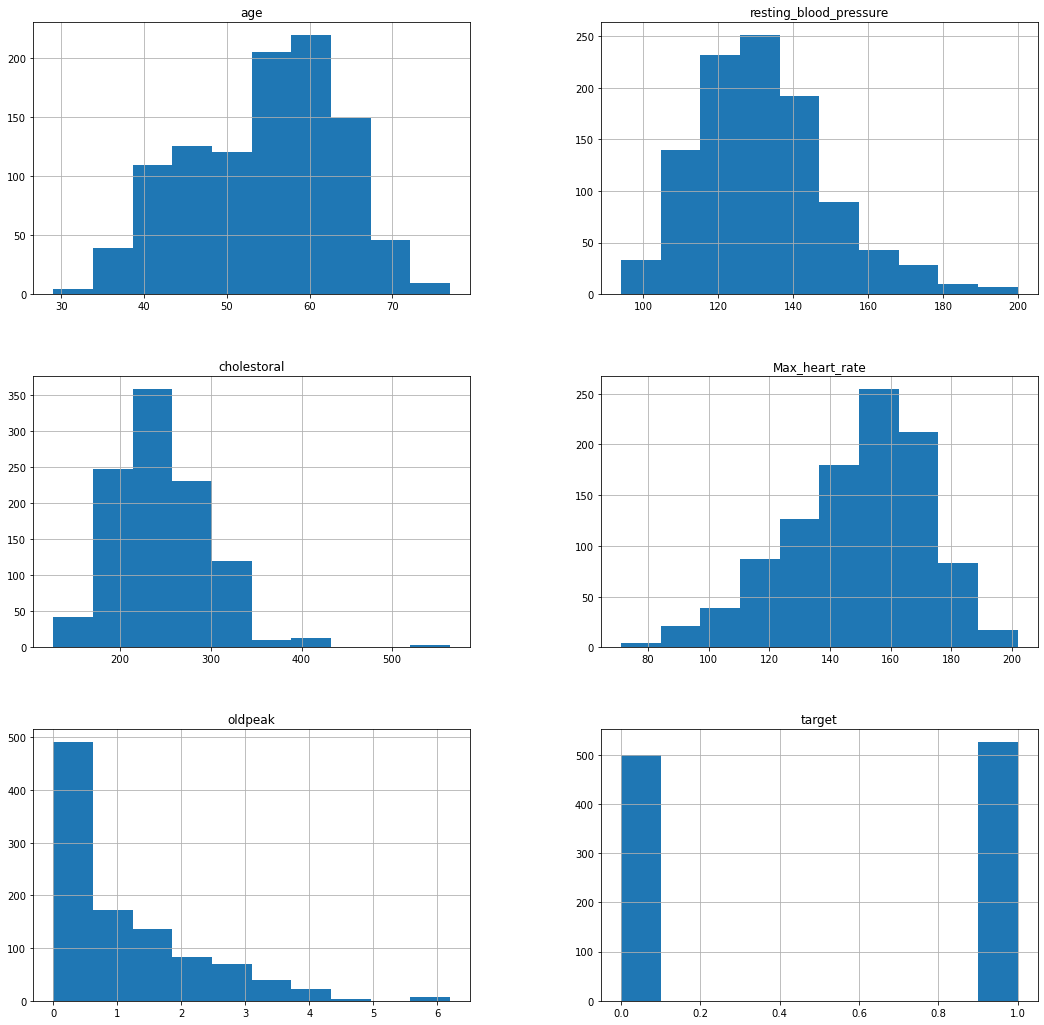

In [12]:
dataset.hist(figsize = (18,18))
plt.show()

                 target
sex    target          
Female 1       0.724359
       0       0.275641
Male   0       0.579243
       1       0.420757


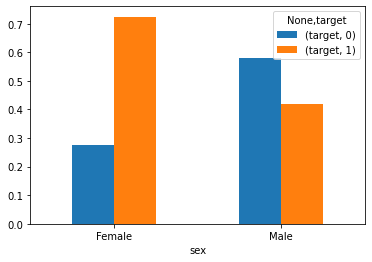

In [13]:
plot2=pd.DataFrame(dataset.groupby('sex')['target'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

target : 0 No Heart disease, 1 Heart disease
Based on the graph above, we can see that Male has the highest number of no heart disease, whereas female is the highest number that has heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

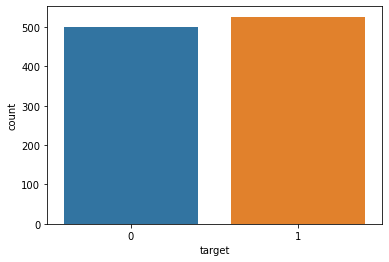

In [14]:
# visualize the target variable
sns.countplot(x='target',data=dataset)

From this count plot, it can be seen that there were a lot of people who not suffer heart disease. The data is imbalance because the ratio is 1:12.

## Correlation

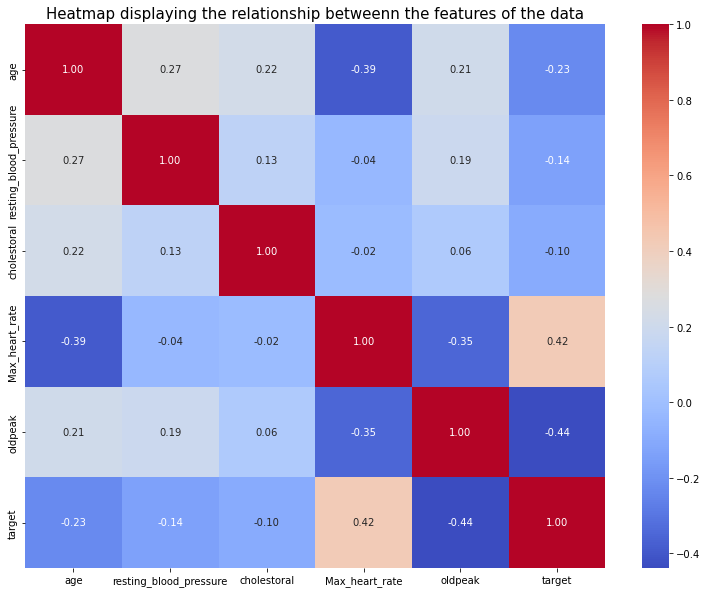

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

## Outliers

<AxesSubplot:xlabel='resting_blood_pressure'>

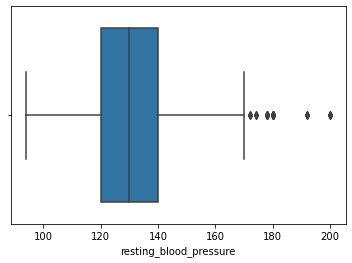

In [16]:
sns.boxplot(x=dataset['resting_blood_pressure'])

<AxesSubplot:xlabel='cholestoral'>

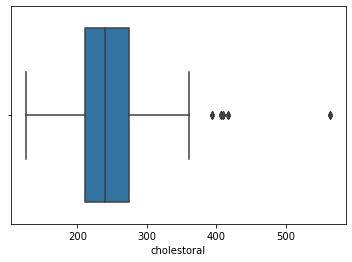

In [17]:
sns.boxplot(x=dataset['cholestoral'])

<AxesSubplot:xlabel='Max_heart_rate'>

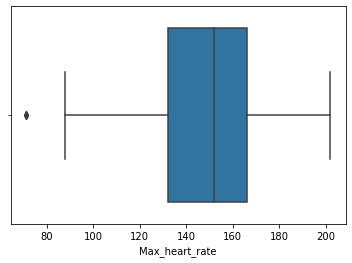

In [18]:
sns.boxplot(x=dataset['Max_heart_rate'])

<AxesSubplot:xlabel='oldpeak'>

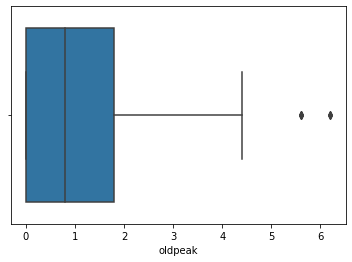

In [19]:
sns.boxplot(x=dataset['oldpeak'])

## Skewness

In [20]:
skew = pd.DataFrame(dataset.skew(numeric_only=True))
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.248866,False
resting_blood_pressure,0.739768,False
cholestoral,1.074073,True
Max_heart_rate,-0.513777,False
oldpeak,1.210899,True
target,-0.052778,False


### Remove outliers

#### BMI

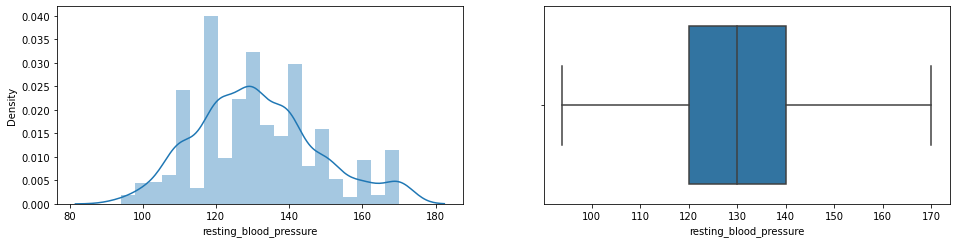

In [21]:
remove_outliers(dataset,'resting_blood_pressure')

#### PhysicalHealth

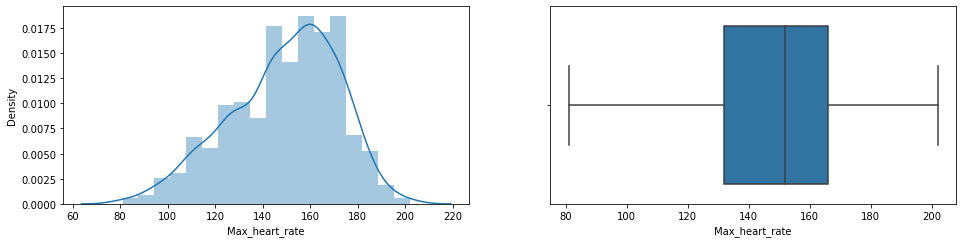

In [22]:
remove_outliers(dataset,'Max_heart_rate')

#### MentalHealth

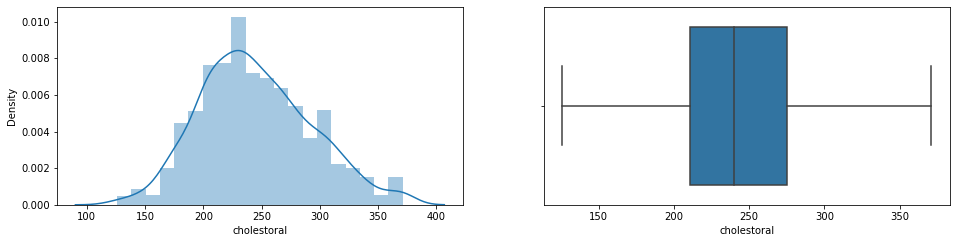

In [23]:
remove_outliers(dataset,'cholestoral')

#### SleepTime

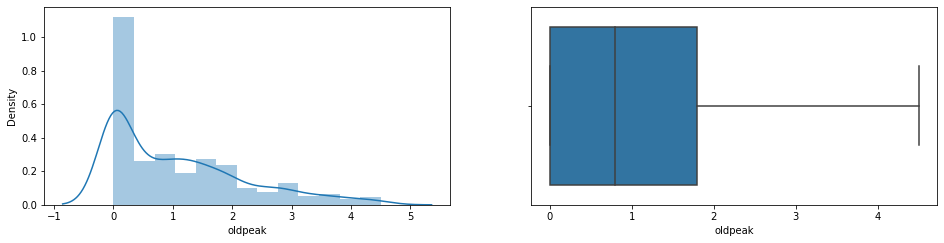

In [24]:
remove_outliers(dataset,'oldpeak')

In [25]:
dataset.shape

(1025, 14)

In [26]:
skew = pd.DataFrame(dataset.skew(numeric_only=True))
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.248866,False
resting_blood_pressure,0.402284,False
cholestoral,0.343813,False
Max_heart_rate,-0.474860,False
oldpeak,1.019303,True
target,-0.052778,False


After I have removed the outliers, the row of the dataset still remain the same.

## Encode data

In [27]:
dataset.shape

(1025, 14)

In [28]:
label_encoder = preprocessing.LabelEncoder()
for col in dataset:
    if dataset[col].dtype.name != 'object':
        continue
    dataset[col]= label_encoder.fit_transform(dataset[col])

In [29]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
[1 0]
[3 1 2 0]
[125. 140. 145. 148. 138. 100. 114. 160. 120. 122. 112. 132. 118. 128.
 124. 106. 104. 135. 130. 136. 170. 129. 150. 146. 117. 152. 154. 134.
 144. 108. 123. 110. 142. 126. 115.  94. 165. 102. 105. 155. 164. 156.
 101.]
[212. 203. 174. 294. 248. 318. 289. 249. 286. 149. 341. 210. 298. 204.
 308. 266. 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 327.
 169. 131. 269. 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226.
 228. 278. 230. 283. 241. 175. 188. 217. 193. 245. 232. 299. 288. 197.
 315. 215. 164. 326. 207. 177. 257. 255. 187. 201. 220. 268. 267. 236.
 303. 282. 126. 309. 186. 275. 281. 206. 335. 218. 254. 295. 371. 260.
 240. 302. 192. 225. 325. 235. 274. 234. 182. 167. 172. 321. 300. 199.
 157. 304. 222. 184. 354. 160. 247. 239. 246. 293. 180. 250. 221. 200.
 227. 243. 311. 261. 242. 205. 306. 219. 353. 198. 183. 237. 224. 265.

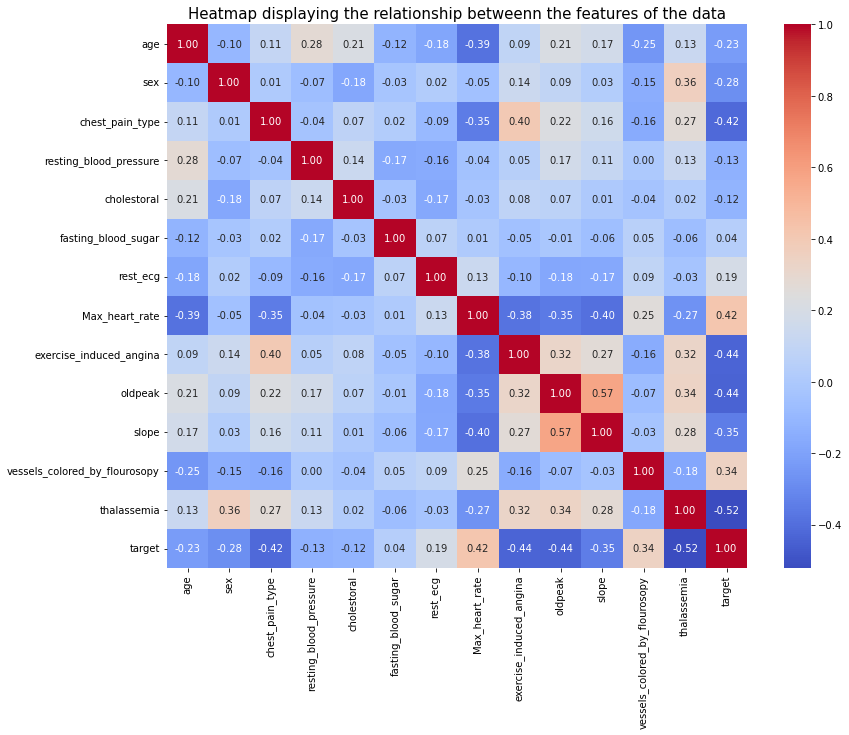

In [30]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

In [31]:
dataset.shape

(1025, 14)

In [32]:
#split data into feature and target
X_data = dataset.drop(['target'],axis=1)
 
y_data = dataset.target.values

# Data Preprocessing

## Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

## Standardization

### Standard Scaler

In [34]:
X_train_ss =  StandardScaler().fit_transform(X_train)
X_test_ss =  StandardScaler().fit_transform(X_test)

### MinMax Scaler

In [35]:
X_train_mm =  MinMaxScaler().fit_transform(X_train)
X_test_mm =  MinMaxScaler().fit_transform(X_test)

## Balance Data

### Oversampling

In [36]:
sm = SMOTE(random_state=2)
X_train_os_ss, y_train_os_ss = sm.fit_resample(X_train_ss, y_train)

In [37]:
X_train_os_mm, y_train_os_mm = sm.fit_resample(X_train_mm, y_train)

In [38]:
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os_ss == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os_ss == 0)))

Before OverSampling, counts of label '1': 430
Before OverSampling, counts of label '0': 390
After OverSampling, counts of label '1': 430
After OverSampling, counts of label '0': 430


### Undersampling

In [40]:
nr = NearMiss()
X_train_us_ss, y_train_us_ss = nr.fit_resample(X_train_ss, y_train)

In [41]:
X_train_us_mm, y_train_us_mm = nr.fit_resample(X_train_mm, y_train)

In [42]:
X_train_us, y_train_us = nr.fit_resample(X_train, y_train)

In [43]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After Undersampling, counts of label '1': {}".format(sum(y_train_us == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_us == 0)))

Before Undersampling, counts of label '1': 430
Before Undersampling, counts of label '0': 390
After Undersampling, counts of label '1': 390
After Undersampling, counts of label '0': 390


# Logistic Regression

## Standard Scaler

In [44]:
model_log = LogisticRegression(solver='liblinear', random_state=0)

The accuracy of testing data is  81.46 %
The ROC_AUC score is  81.89 %
 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       109
           1       0.76      0.89      0.82        96

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205



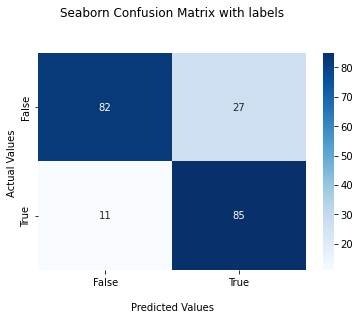

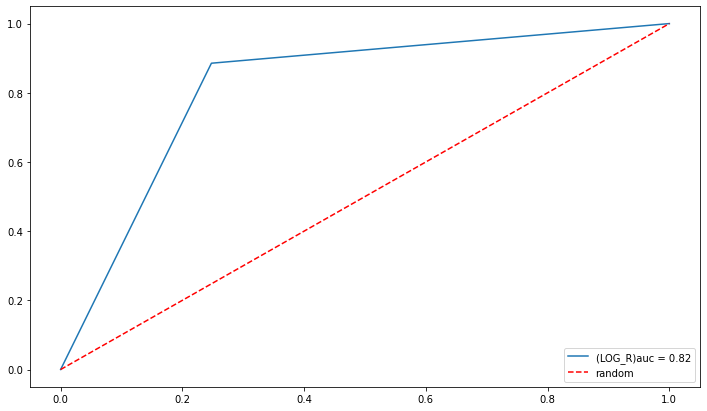

In [45]:
model, X_test_ss, y_test, y_pred = fit_model(model_log, X_train_ss, X_test_ss, y_train, y_test)
accuracy_report(model, X_test_ss, y_test, y_pred)

## MinMax Scaler

The accuracy of testing data is  81.95 %
The ROC_AUC score is  82.28 %
 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       109
           1       0.77      0.88      0.82        96

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



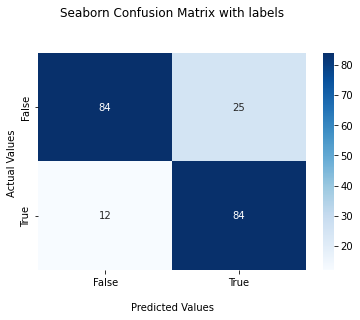

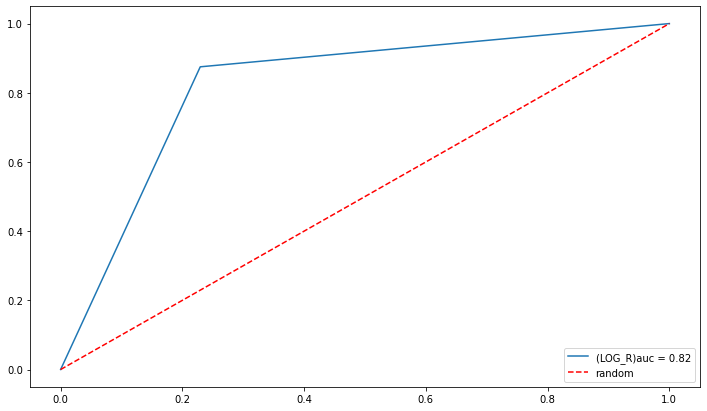

In [46]:
model, X_test_mm, y_test, y_pred = fit_model(model_log, X_train_mm, X_test_mm, y_train, y_test)
accuracy_report(model, X_test_mm, y_test, y_pred)

## With Oversampling

The accuracy of testing data is  82.93 %
The ROC_AUC score is  83.14 %
 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       109
           1       0.79      0.86      0.83        96

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



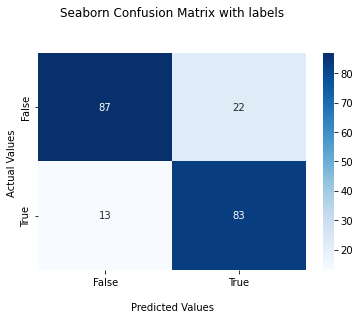

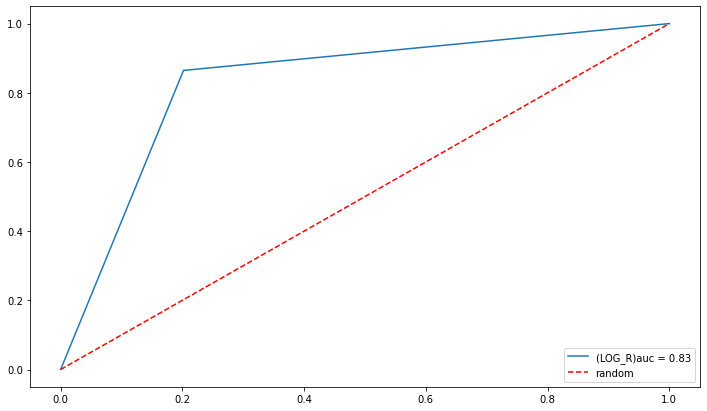

In [47]:
model, X_test, y_test, y_pred = fit_model(model_log, X_train_os, X_test, y_train_os, y_test)
accuracy_report(model, X_test, y_test, y_pred)

### Standard Scaler

The accuracy of testing data is  80.49 %
The ROC_AUC score is  80.84 %
 
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       109
           1       0.75      0.86      0.81        96

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



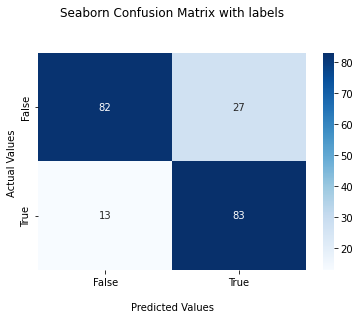

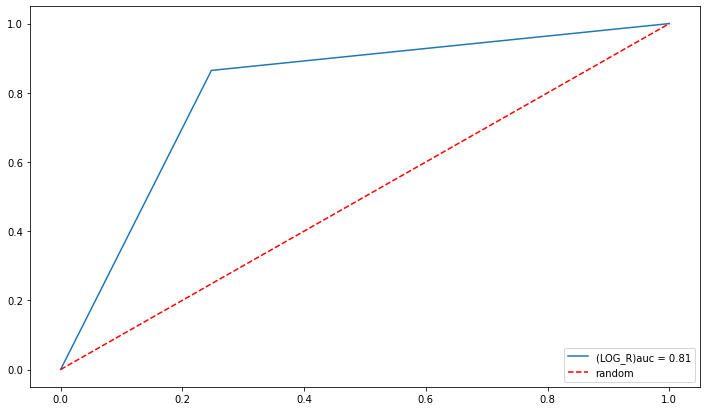

In [48]:
model, X_test_ss, y_test, y_pred = fit_model(model_log, X_train_os_ss, X_test_ss, y_train_os_ss, y_test)
accuracy_report(model, X_test_ss, y_test, y_pred)

### MinMax Scaler

The accuracy of testing data is  81.95 %
The ROC_AUC score is  82.28 %
 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       109
           1       0.77      0.88      0.82        96

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



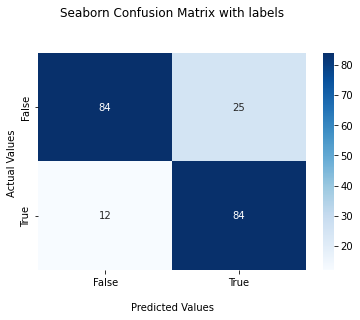

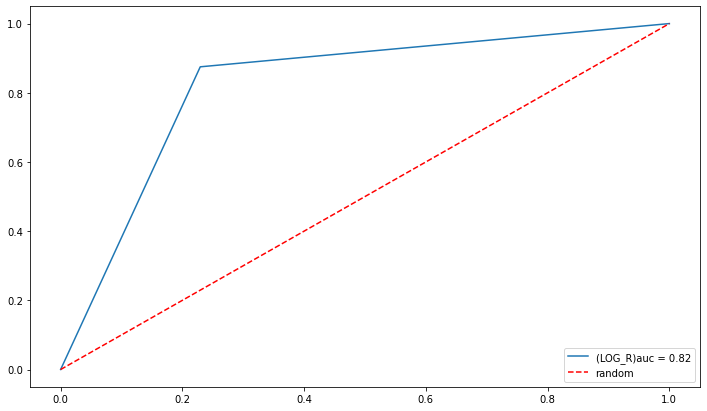

In [49]:
model, X_test_mm, y_test, y_pred = fit_model(model_log, X_train_os_mm, X_test_mm, y_train_os_mm, y_test)
accuracy_report(model, X_test_mm, y_test, y_pred)

## With Undersampling

The accuracy of testing data is  82.93 %
The ROC_AUC score is  83.14 %
 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       109
           1       0.79      0.86      0.83        96

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



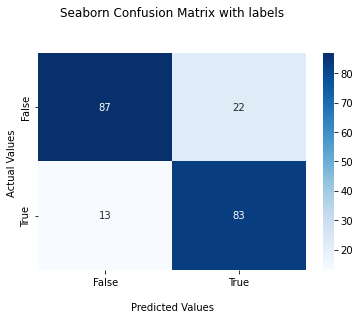

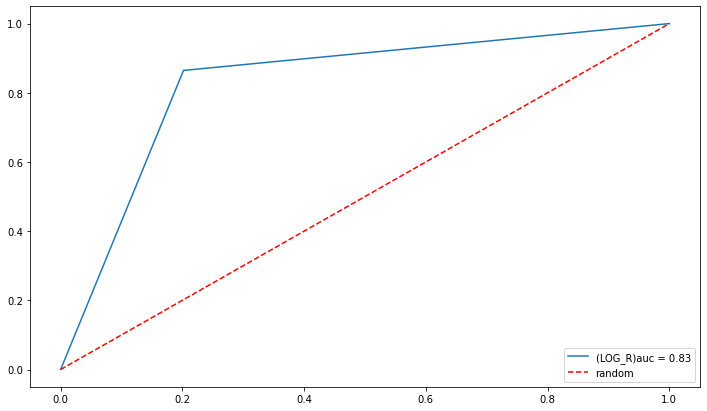

In [50]:
model, X_test, y_test, y_pred = fit_model(model_log, X_train_us, X_test, y_train_us, y_test)
accuracy_report(model, X_test, y_test, y_pred)

### Standard Scaler

The accuracy of testing data is  83.41 %
The ROC_AUC score is  83.66 %
 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       109
           1       0.79      0.88      0.83        96

    accuracy                           0.83       205
   macro avg       0.84      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



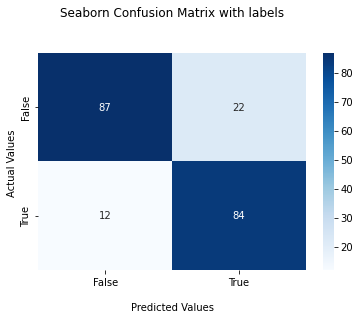

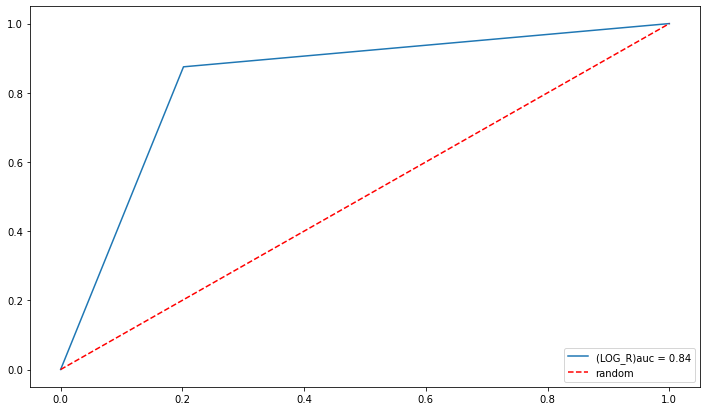

In [51]:
model, X_test_ss, y_test, y_pred = fit_model(model_log, X_train_us_ss, X_test_ss, y_train_us_ss, y_test)
accuracy_report(model, X_test_ss, y_test, y_pred)

### MinMax Scaler

The accuracy of testing data is  76.59 %
The ROC_AUC score is  77.30 %
 
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       109
           1       0.70      0.89      0.78        96

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.79      0.77      0.76       205



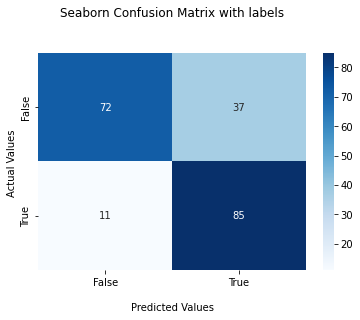

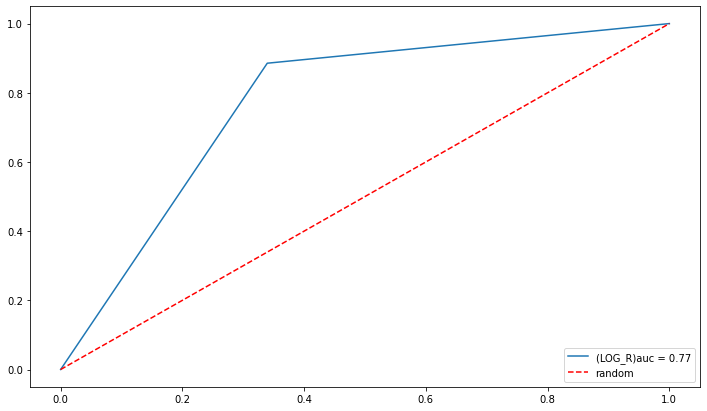

In [52]:
model, X_test_mm, y_test, y_pred = fit_model(model_log, X_train_us_mm, X_test_ss, y_train_us_mm, y_test)
accuracy_report(model, X_test_mm, y_test, y_pred)

## Hyperparameter Tuning

In [53]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [54]:
clf = GridSearchCV(model_log, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [55]:
best_clf = clf.fit(X_train_us_ss,y_train_us_ss)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [56]:
best_para = best_clf.best_estimator_
best_para

LogisticRegression(C=0.012742749857031334, random_state=0)

In [57]:
best_clf.best_score_

0.8217948717948719

In [58]:
y_pred1 = best_clf.best_estimator_.predict(X_test_ss)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.824390243902439


### GridSearch 

As we can see, using Undersampling with Standard Scaler has the most highest accuracy in Logistic Regression algorithm which is 83.41%. We try to use hyperparameter tuning to improve the accuracy.

In [59]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_us_ss,y_train_us_ss)

In [60]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836752 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835043 (0.039961) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835043 (0.039961) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835043 (0.039961) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.835043 (0.039961) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835043 (0.039961) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835043 (0.039961) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.834615 (0.040046) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834615 (0.040046) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834615 (0.040046) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.836752 (0.037587) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.836752 (0.037587) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.836752 (0.037587) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.832906 (0.038388) wit

The accuracy of testing data is  82.44 %
The ROC_AUC score is  82.74 %
 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.78      0.88      0.82        96

    accuracy                           0.82       205
   macro avg       0.83      0.83      0.82       205
weighted avg       0.83      0.82      0.82       205



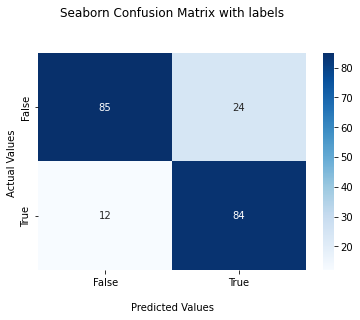

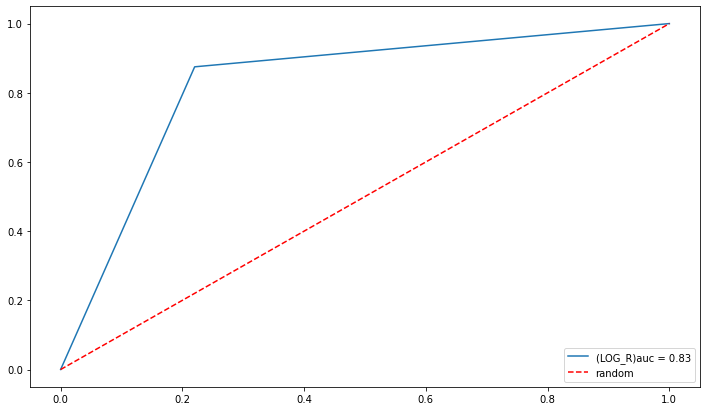

In [61]:
model, X_test_ss, y_test, y_pred = fit_model(grid_result, X_train_us_ss, X_test_ss, y_train_us_ss, y_test)
accuracy_report(model, X_test_ss, y_test, y_pred)

### RandomSearch

In [62]:
from scipy.stats import loguniform
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_us_ss,y_train_us_ss)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8470085470085469
Best Hyperparameters: {'C': 0.06439463488317819, 'penalty': 'l1', 'solver': 'liblinear'}


In [63]:
result.best_params_

{'C': 0.06439463488317819, 'penalty': 'l1', 'solver': 'liblinear'}

The accuracy of testing data is  80.49 %
The ROC_AUC score is  80.78 %
 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       109
           1       0.76      0.85      0.80        96

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



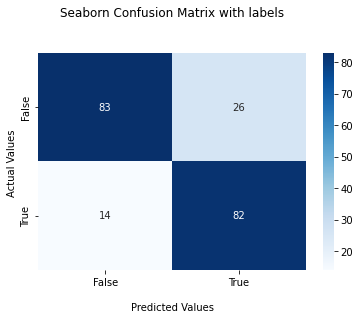

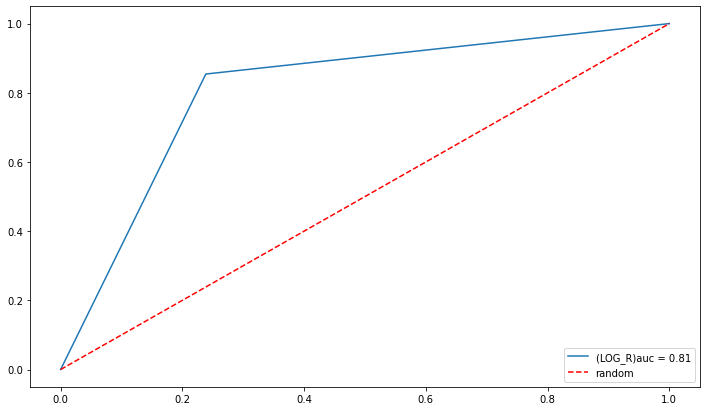

In [64]:
model2, X_test_ss2, y_test2, y_pred2 = fit_model(result, X_train_us_ss, X_test_ss, y_train_us_ss, y_test)
accuracy_report(model2, X_test_ss2, y_test2, y_pred2)

In [ ]:
Hi guys, I have used the hyperparameter tuning to improve my accuracy and to find the best parameters of the algorithms. After i used gridsearch or randomsearch, i get the accuracy that is lower than the parameters which are not doing hyperparameter tuning.